# Bifurcation Diagram of the Logistic Map

## Introduction

A **bifurcation diagram** is a visual summary of the qualitative changes (bifurcations) in the dynamics of a system as a parameter is varied. It provides profound insight into how deterministic systems can transition from stable, predictable behavior to chaotic dynamics.

## The Logistic Map

The logistic map is a canonical example of how complex, chaotic behavior can arise from simple nonlinear dynamical equations. It is defined by the recurrence relation:

$$x_{n+1} = r x_n (1 - x_n)$$

where:
- $x_n \in [0, 1]$ represents the population ratio at generation $n$
- $r \in [0, 4]$ is the growth rate parameter

## Bifurcation Analysis

As the parameter $r$ increases, the system undergoes a series of **period-doubling bifurcations**:

1. **$0 < r < 1$**: The population dies out; $x^* = 0$ is the only attractor.

2. **$1 < r < 3$**: A single stable fixed point exists at:
   $$x^* = \frac{r - 1}{r}$$

3. **$3 < r < 3.449...$**: The fixed point becomes unstable, and a stable 2-cycle emerges (period-2 orbit).

4. **$3.449... < r < 3.544...$**: Period-4 orbit appears.

5. **$r > 3.5699...$**: The system enters the chaotic regime, interspersed with periodic windows.

## Feigenbaum Constants

The rate at which period-doubling occurs is governed by the **Feigenbaum constant**:

$$\delta = \lim_{n \to \infty} \frac{r_{n-1} - r_{n-2}}{r_n - r_{n-1}} \approx 4.669201...$$

This universal constant appears in all unimodal maps undergoing period-doubling cascades.

## Objective

In this notebook, we will:
1. Implement the logistic map iteration
2. Generate the bifurcation diagram by sampling attractors for varying $r$
3. Visualize the transition from order to chaos

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

## Implementation

### Logistic Map Function

We define the logistic map and a function to compute the attractor points for a given parameter value $r$.

In [2]:
def logistic_map(x, r):
    """
    Compute one iteration of the logistic map.
    
    Parameters
    ----------
    x : float
        Current population ratio (between 0 and 1)
    r : float
        Growth rate parameter
        
    Returns
    -------
    float
        Next population ratio
    """
    return r * x * (1 - x)


def compute_attractor(r, x0=0.5, n_transient=1000, n_attractor=100):
    """
    Compute attractor points for a given r value.
    
    Parameters
    ----------
    r : float
        Growth rate parameter
    x0 : float
        Initial condition
    n_transient : int
        Number of iterations to discard (transient)
    n_attractor : int
        Number of attractor points to record
        
    Returns
    -------
    ndarray
        Array of attractor points
    """
    x = x0
    
    # Discard transient iterations
    for _ in range(n_transient):
        x = logistic_map(x, r)
    
    # Record attractor points
    attractor = np.zeros(n_attractor)
    for i in range(n_attractor):
        x = logistic_map(x, r)
        attractor[i] = x
    
    return attractor

### Bifurcation Diagram Generation

We sweep through parameter values and collect attractor points for each $r$.

In [3]:
def generate_bifurcation_data(r_min=2.5, r_max=4.0, n_r=1000, 
                               n_transient=1000, n_attractor=100):
    """
    Generate bifurcation diagram data.
    
    Parameters
    ----------
    r_min : float
        Minimum r value
    r_max : float
        Maximum r value
    n_r : int
        Number of r values to sample
    n_transient : int
        Transient iterations per r
    n_attractor : int
        Attractor points per r
        
    Returns
    -------
    r_values : ndarray
        Array of r values (repeated for each attractor point)
    x_values : ndarray
        Corresponding attractor x values
    """
    r_range = np.linspace(r_min, r_max, n_r)
    
    # Preallocate arrays
    r_values = np.zeros(n_r * n_attractor)
    x_values = np.zeros(n_r * n_attractor)
    
    for i, r in enumerate(r_range):
        attractor = compute_attractor(r, n_transient=n_transient, 
                                      n_attractor=n_attractor)
        start_idx = i * n_attractor
        end_idx = start_idx + n_attractor
        r_values[start_idx:end_idx] = r
        x_values[start_idx:end_idx] = attractor
    
    return r_values, x_values


# Generate bifurcation data
print("Generating bifurcation diagram data...")
r_values, x_values = generate_bifurcation_data(
    r_min=2.5, 
    r_max=4.0, 
    n_r=2000,
    n_transient=1000,
    n_attractor=150
)
print(f"Generated {len(r_values)} data points")

Generating bifurcation diagram data...
Generated 300000 data points


## Visualization

### Main Bifurcation Diagram

The diagram reveals the intricate structure of the logistic map's dynamics, including:
- Period-doubling cascade
- Onset of chaos
- Periodic windows within chaos
- Self-similar (fractal) structure

Bifurcation diagram saved to 'plot.png'


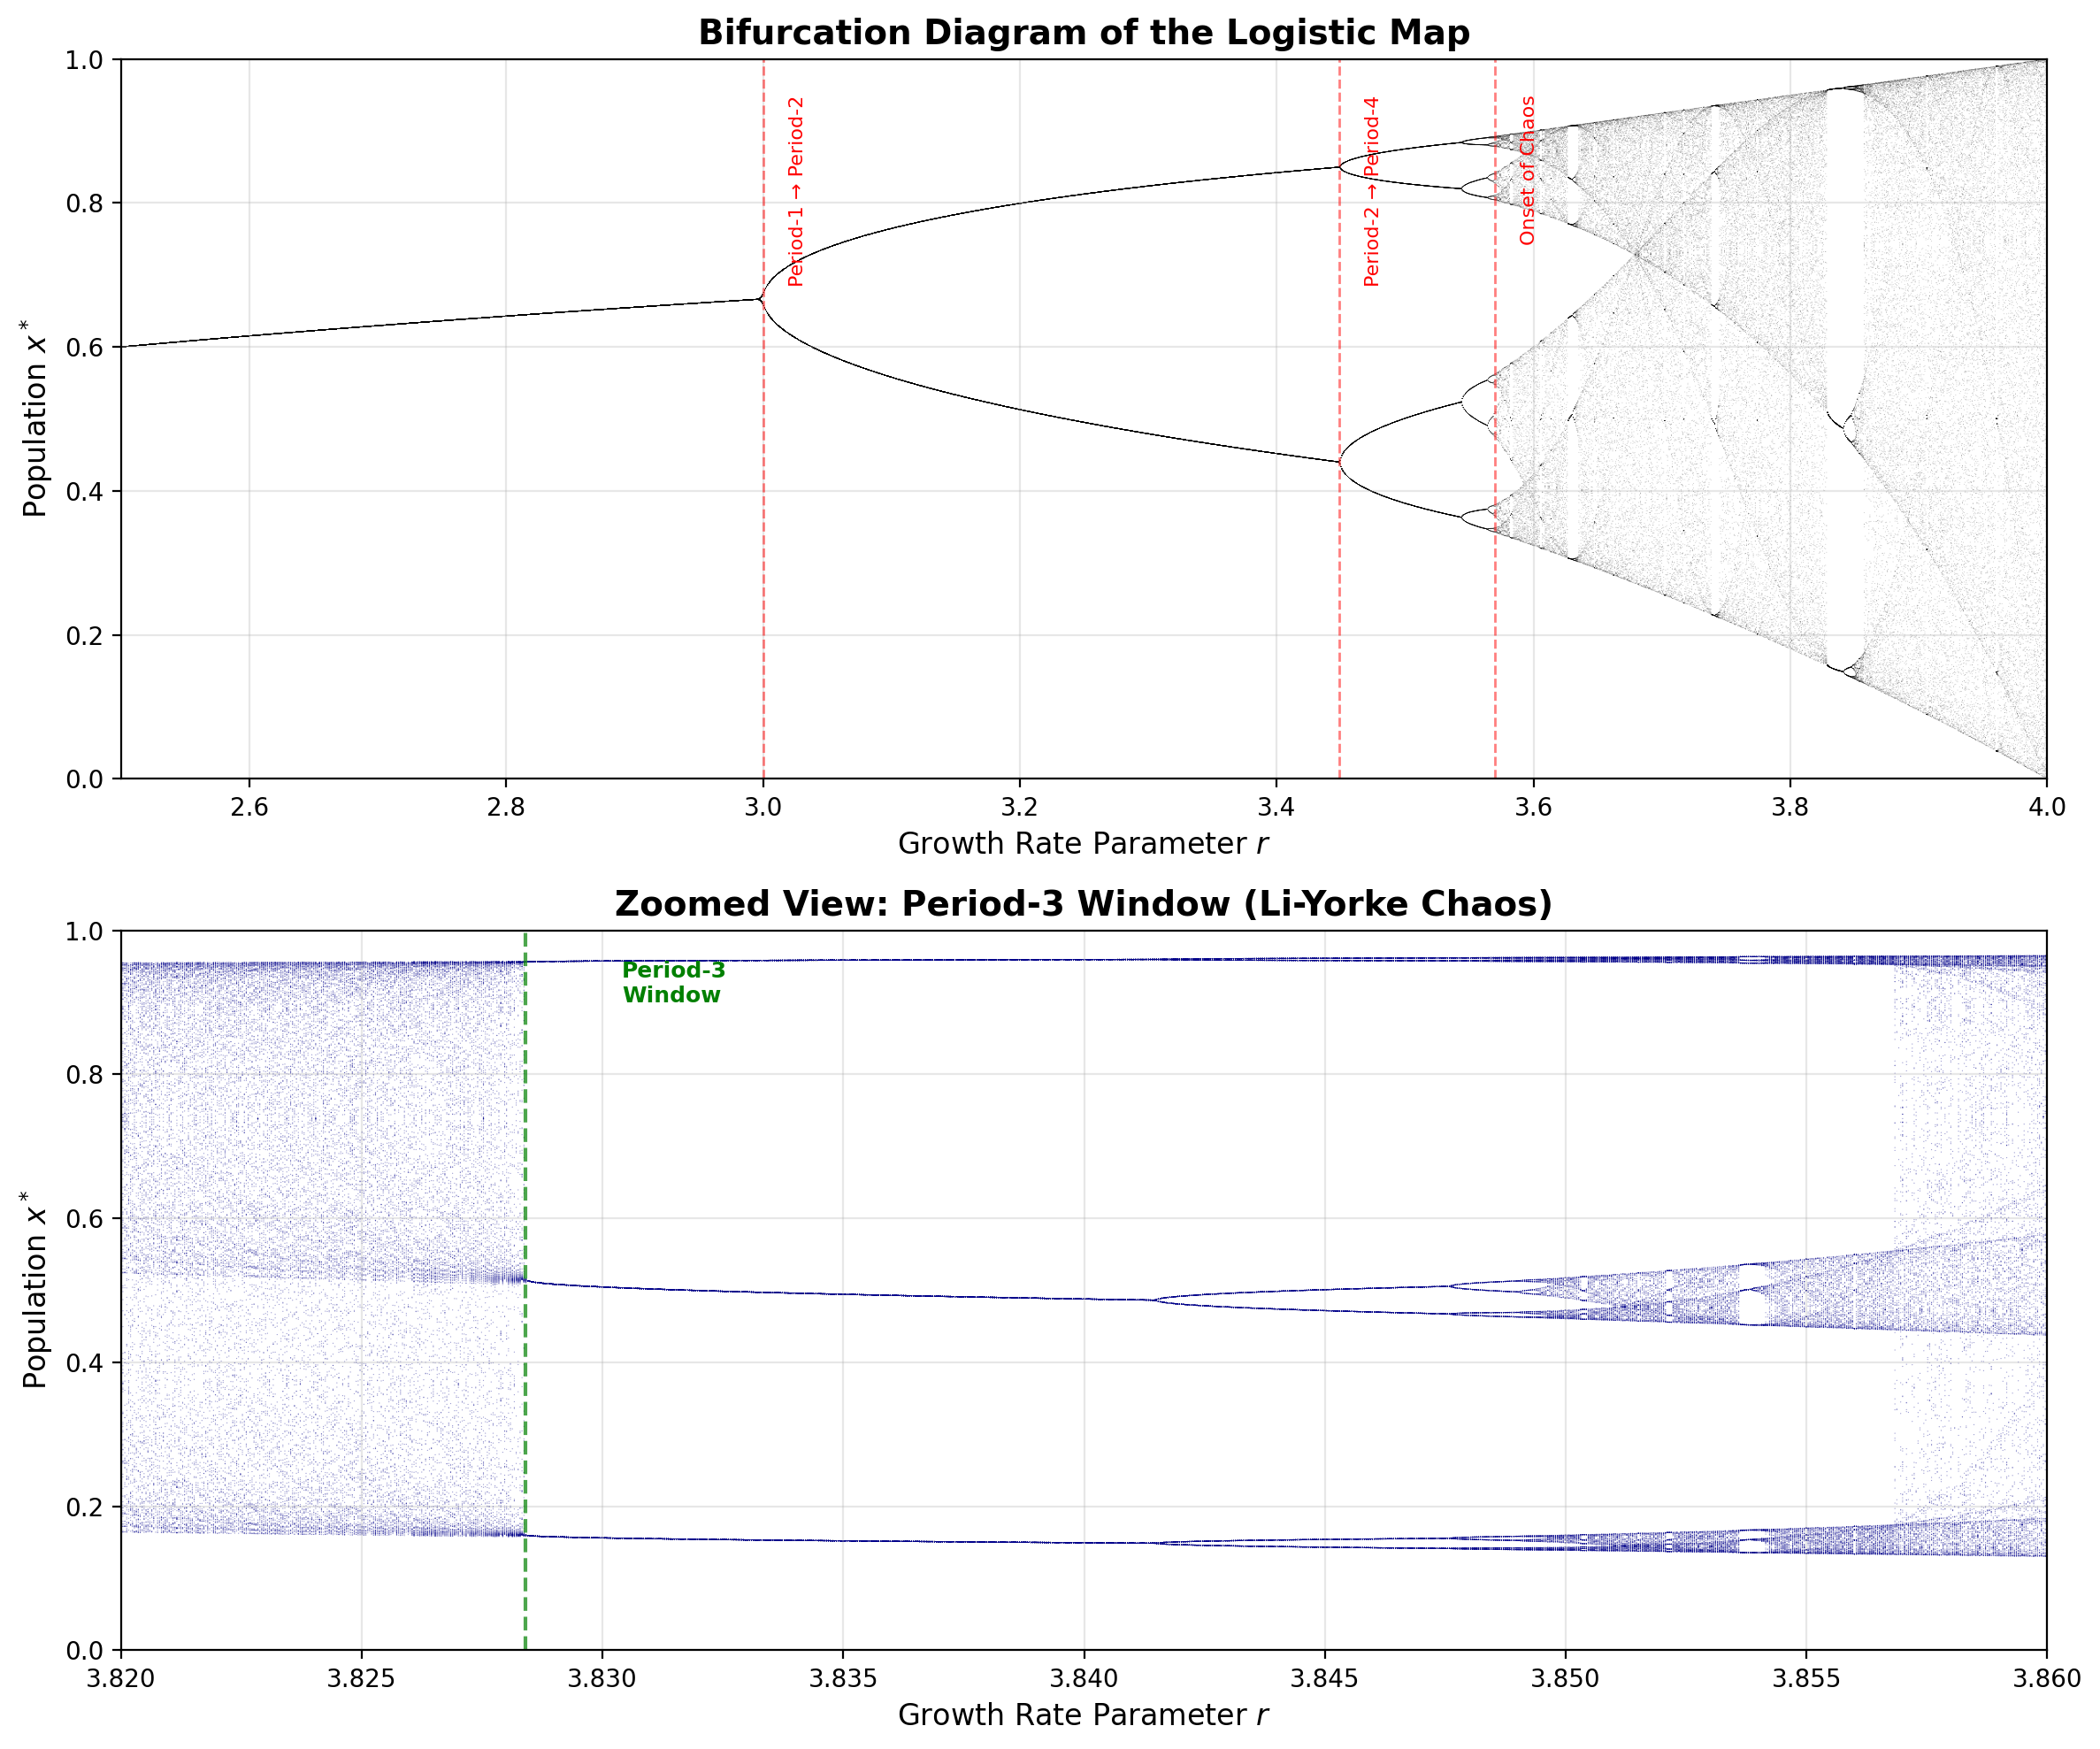

In [4]:
# Create the bifurcation diagram
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Main bifurcation diagram
ax1 = axes[0]
ax1.scatter(r_values, x_values, s=0.1, c='black', alpha=0.3, 
            edgecolors='none')
ax1.set_xlabel(r'Growth Rate Parameter $r$', fontsize=12)
ax1.set_ylabel(r'Population $x^*$', fontsize=12)
ax1.set_title('Bifurcation Diagram of the Logistic Map', fontsize=14, 
              fontweight='bold')
ax1.set_xlim(2.5, 4.0)
ax1.set_ylim(0, 1)
ax1.grid(True, alpha=0.3)

# Mark key bifurcation points
bifurcation_points = [
    (3.0, 'Period-1 → Period-2'),
    (3.449, 'Period-2 → Period-4'),
    (3.5699, 'Onset of Chaos')
]

for r_bif, label in bifurcation_points:
    ax1.axvline(x=r_bif, color='red', linestyle='--', alpha=0.5, linewidth=1)
    ax1.text(r_bif + 0.02, 0.95, label, fontsize=8, rotation=90, 
             va='top', color='red')

# Zoomed view of period-3 window
ax2 = axes[1]

# Generate higher resolution data for zoom
r_zoom, x_zoom = generate_bifurcation_data(
    r_min=3.82, 
    r_max=3.86, 
    n_r=1000,
    n_transient=2000,
    n_attractor=200
)

ax2.scatter(r_zoom, x_zoom, s=0.2, c='darkblue', alpha=0.4, 
            edgecolors='none')
ax2.set_xlabel(r'Growth Rate Parameter $r$', fontsize=12)
ax2.set_ylabel(r'Population $x^*$', fontsize=12)
ax2.set_title('Zoomed View: Period-3 Window (Li-Yorke Chaos)', 
              fontsize=14, fontweight='bold')
ax2.set_xlim(3.82, 3.86)
ax2.set_ylim(0, 1)
ax2.grid(True, alpha=0.3)

# Annotate the period-3 window
ax2.axvline(x=3.8284, color='green', linestyle='--', alpha=0.7)
ax2.text(3.8284 + 0.002, 0.9, 'Period-3\nWindow', fontsize=9, 
         color='green', fontweight='bold')

plt.tight_layout()

# Save the figure
plt.savefig('bifurcation_diagram_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
print("Bifurcation diagram saved to 'plot.png'")

plt.show()

## Analysis and Observations

### Key Features of the Bifurcation Diagram

1. **Period-Doubling Cascade**: As $r$ increases from 3, we observe successive bifurcations where the period doubles: $1 \to 2 \to 4 \to 8 \to 16 \to ...$

2. **Accumulation Point**: The bifurcations accumulate at $r_\infty \approx 3.5699456...$, beyond which chaos begins.

3. **Periodic Windows**: Within the chaotic regime, there are "windows" of periodic behavior. The most prominent is the period-3 window near $r \approx 3.83$.

4. **Li-Yorke Theorem**: The existence of a period-3 orbit implies the existence of orbits of all periods, and hence chaos. This is captured by the famous result: "Period three implies chaos."

5. **Self-Similarity**: The diagram exhibits fractal structure—zooming into any chaotic region reveals similar period-doubling patterns.

### Physical Significance

The bifurcation diagram demonstrates how simple deterministic systems can exhibit:
- **Sensitive dependence on parameters**: Small changes in $r$ cause qualitative changes in dynamics
- **Route to chaos**: A universal mechanism through period-doubling
- **Universality**: The Feigenbaum constants appear in diverse physical systems

Applications include population dynamics, fluid turbulence, electronic circuits, and cardiac rhythms.

In [5]:
# Compute and display approximate bifurcation points
def find_bifurcation_points():
    """
    Estimate the first few period-doubling bifurcation points.
    """
    # Theoretical values
    r_bif = [
        3.0,           # Period-1 to Period-2
        3.4494897,     # Period-2 to Period-4
        3.5440903,     # Period-4 to Period-8
        3.5644073,     # Period-8 to Period-16
        3.5687594,     # Period-16 to Period-32
        3.5696916      # Period-32 to Period-64
    ]
    
    print("Period-Doubling Bifurcation Points")
    print("=" * 45)
    print(f"{'Bifurcation':<15} {'r value':<15} {'Δr':<15}")
    print("-" * 45)
    
    for i, r in enumerate(r_bif):
        if i == 0:
            print(f"Period-{2**i} → {2**(i+1):<5} {r:<15.7f} {'—':<15}")
        else:
            delta_r = r - r_bif[i-1]
            print(f"Period-{2**i} → {2**(i+1):<5} {r:<15.7f} {delta_r:<15.7f}")
    
    # Compute Feigenbaum delta
    print("\nFeigenbaum Constant Estimation")
    print("=" * 45)
    
    for i in range(2, len(r_bif)):
        delta = (r_bif[i-1] - r_bif[i-2]) / (r_bif[i] - r_bif[i-1])
        print(f"δ_{i} = {delta:.6f}")
    
    print(f"\nTheoretical Feigenbaum δ = 4.669201...")

find_bifurcation_points()

Period-Doubling Bifurcation Points
Bifurcation     r value         Δr             
---------------------------------------------
Period-1 → 2     3.0000000       —              
Period-2 → 4     3.4494897       0.4494897      
Period-4 → 8     3.5440903       0.0946006      
Period-8 → 16    3.5644073       0.0203170      
Period-16 → 32    3.5687594       0.0043521      
Period-32 → 64    3.5696916       0.0009322      

Feigenbaum Constant Estimation
δ_2 = 4.751447
δ_3 = 4.656229
δ_4 = 4.668321
δ_5 = 4.668633

Theoretical Feigenbaum δ = 4.669201...


## Conclusion

The bifurcation diagram of the logistic map serves as a fundamental illustration of how complexity and chaos emerge from simple nonlinear dynamics. The period-doubling route to chaos, governed by universal Feigenbaum constants, represents one of the most important discoveries in dynamical systems theory.

This analysis demonstrates:
- The transition from stable equilibria to periodic orbits to chaos
- The existence of periodic windows within chaotic regimes
- The self-similar, fractal nature of the diagram
- Universal quantitative features (Feigenbaum constants)

### References

1. May, R. M. (1976). Simple mathematical models with very complicated dynamics. *Nature*, 261(5560), 459-467.
2. Feigenbaum, M. J. (1978). Quantitative universality for a class of nonlinear transformations. *Journal of Statistical Physics*, 19(1), 25-52.
3. Li, T. Y., & Yorke, J. A. (1975). Period three implies chaos. *The American Mathematical Monthly*, 82(10), 985-992.